In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import numpy as np
a = pd.DataFrame(np.zeros((3,4)))
a

,0,1,2,3
0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0


In [7]:
a.columns=['a','b','c','d']
a.index=[0,0,1]

In [9]:
a.loc[0].a.tolist()

[0.0, 0.0]

In [2]:
df = pd.read_csv("SLICE_05_mmc2_single_cell_states.csv",index_col=0)

In [3]:
df.head()

,"Hpcal1,Poised-down","Trim62,Poised-down","Kcnh2,Poised-down","Gm5662,Primed","Galns,Poised-down","Hsd3b2,Poised-up","Afap1,Poised-down","Ptrf,Naive-F","Disp2,Poised-down","Msln,Naive-F",...,"Bmp6,Poised-down","Farp1,Poised-down","Myo1g,Naive-S","Myo1f,Poised-up","Tinagl1,Poised-down","Gm1840,Poised-down","Padi2,Naive-F","Zic2,Primed","Padi4,Naive-F",total_number_interactions
F16A7,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,2.50,0.0,0.0,0.0,0.0,0.0,9930.0
F5F4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,4668.0
F9A4,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,16.3,0.0,0.00,0.0,0.0,2.0,0.0,2.0,7099.0
F18B2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,...,0.0,0.0,0.0,2.50,0.0,0.0,0.0,0.0,0.0,8656.0
F6G3,0.0,2.0,0.0,2.0,0.0,0.0,0.0,15.0,0.0,4.0,...,0.0,0.0,0.0,2.25,0.0,0.0,0.0,0.0,0.0,15605.0


In [13]:
from sklearn.decomposition import PCA
y = PCA(2).fit_transform(df[df.columns[:-1]])

In [16]:
y.shape

(408, 2)

In [19]:
data = pd.DataFrame(y,columns=["p1",'p2'])
data.head()

,p1,p2
0,-6.162652,0.722658
1,-5.111653,4.746656
2,2.765025,6.218609
3,-4.928455,1.161139
4,0.403750,26.355776


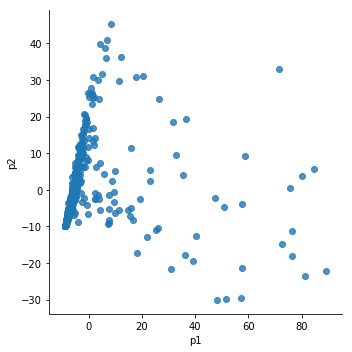

In [20]:
sns.lmplot(x="p1", y="p2", data=data,fit_reg=False)

In [21]:
from sklearn.manifold import TSNE

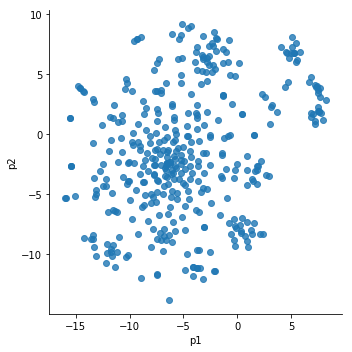

In [22]:
y1 = TSNE().fit_transform(df[df.columns[:-1]])
data1 = pd.DataFrame(y1,columns=["p1",'p2'])
sns.lmplot(x="p1", y="p2", data=data1,fit_reg=False)

In [23]:
real_name = ['Poised-down','Poised-up','Naive-F','Naive-S','Primed']

In [24]:
cat = {}
for r in real_name:
    cat[r] = []
    for c in df.columns:
        if r in c:
            cat[r].append(c)

In [28]:
df[cat["Poised-down"]].mean(axis=1)

F16A7    0.461224
F5F4     0.063686
F9A4     0.216226
F18B2    0.324712
F6G3     0.665847
F11B2    0.628427
F16C4    0.429612
F16E2    0.575173
F12F4    0.274711
F5B4     0.200775
F9F3     0.361638
F8G2     0.183338
F16D1    0.300778
F7D6     0.571010
F16E1    0.528935
F16F3    0.217246
F10E2    0.635856
F12B2    0.137536
F16A2    0.776036
F7A5     0.508495
F7B1     0.686093
F9E2     0.866719
F17C6    0.152811
F8B4     0.008434
F5C1     0.333606
F7F6     0.939260
F10F3    0.254727
F5A2     0.114286
F10F4    0.493499
F9A2     0.265492
           ...   
F9A1     0.606535
F6B3     0.079808
F10D6    0.106182
F16B4    0.260944
F10C2    0.097178
F15C2    0.195978
F10A2    0.449225
F8D2     0.159650
F15E6    0.287969
F8B6     0.053574
F3F1     0.535290
F9D3     0.811025
F15B7    0.440527
F15G4    0.231643
F12D5    0.053764
F8D1     0.000000
F17F6    0.373477
F7B6     0.416770
F9G5     0.286521
F5E2     0.046787
F12G2    0.267033
F15F6    0.277303
F6E2     0.578872
F17D7    0.284718
F6B4     0

In [31]:
df2 = pd.concat(list(map(lambda x:df[cat[x]].mean(axis=1),real_name)),axis=1)
df2.columns = real_name
df2.head()

,Poised-down,Poised-up,Naive-F,Naive-S,Primed
F16A7,0.461224,0.393645,0.367150,0.357590,0.748214
F5F4,0.063686,0.462892,0.000000,0.056738,0.049107
F9A4,0.216226,0.597120,0.057971,0.428637,0.402381
F18B2,0.324712,0.487132,0.514493,0.615662,0.250000
F6G3,0.665847,1.300490,0.566023,0.676613,0.940476


In [93]:
df5 = pd.concat(list(map(lambda x:df[cat[x]].sum(axis=1),real_name)),axis=1)
df5.columns = real_name
df5.head()

,Poised-down,Poised-up,Naive-F,Naive-S,Primed
F16A7,191.407937,53.535714,25.333333,50.420238,31.4250
F5F4,26.429487,62.953283,0.000000,8.000000,2.0625
F9A4,89.733929,81.208333,4.000000,60.437879,16.9000
F18B2,134.755311,66.250000,35.500000,86.808333,10.5000
F6G3,276.326673,176.866667,39.055556,95.402381,39.5000


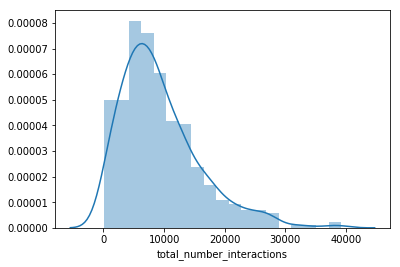

In [101]:
import numpy as np
sns.distplot(df.total_number_interactions)

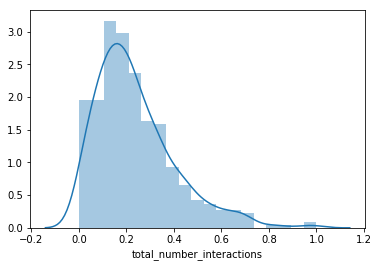

In [100]:
normalized_df=(df-df.min())/(df.max()-df.min())
sns.distplot(normalized_df.total_number_interactions)

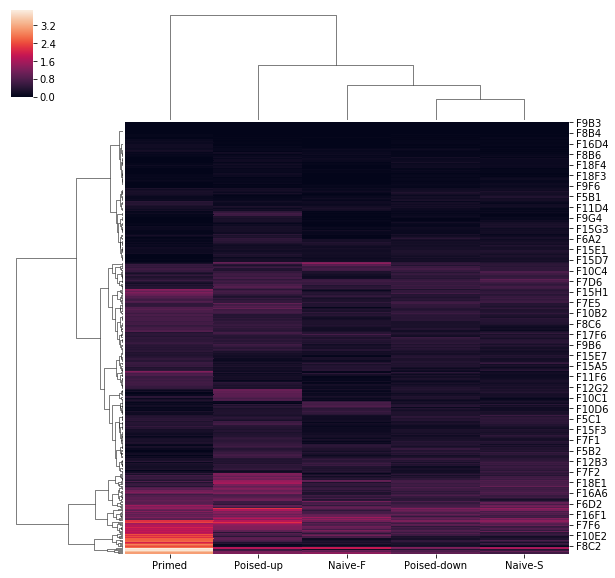

In [106]:
sns.clustermap(df2,method="ward")

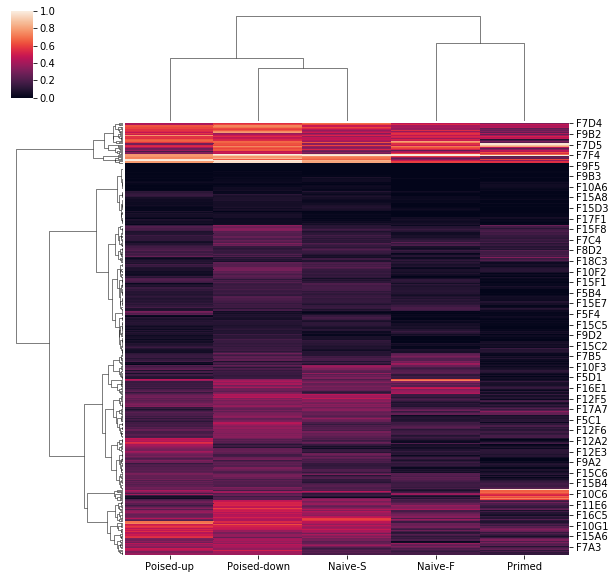

In [74]:
sns.clustermap(df2/df2.max(),method="ward")

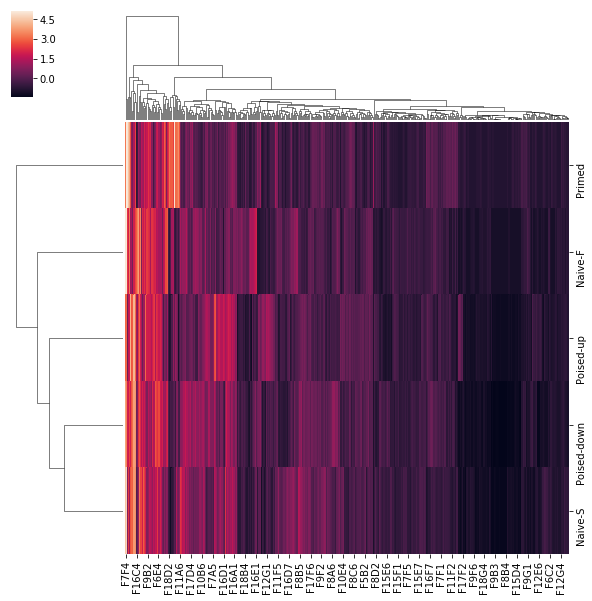

In [77]:
sns.clustermap(df2.transpose(),z_score=0)

In [78]:
df3 = df2.transpose()
df3.head()

,F16A7,F5F4,F9A4,F18B2,F6G3,F11B2,F16C4,F16E2,F12F4,F5B4,...,F12G2,F15F6,F6E2,F17D7,F6B4,F16F7,F16G4,F8D3,F7B4,F11A4
Poised-down,0.461224,0.063686,0.216226,0.324712,0.665847,0.628427,0.429612,0.575173,0.274711,0.200775,...,0.267033,0.277303,0.578872,0.284718,0.034165,0.355785,0.491017,0.511017,0.606765,0.250594
Poised-up,0.393645,0.462892,0.597120,0.487132,1.300490,1.009866,1.012890,0.813866,0.590074,0.221661,...,0.352328,0.943934,0.663340,0.168026,0.000000,0.459559,0.802250,0.684366,0.707323,0.191176
Naive-F,0.367150,0.000000,0.057971,0.514493,0.566023,0.371832,1.225673,0.522222,0.352657,0.178744,...,0.132664,0.072464,0.205314,0.304348,0.000000,0.189521,0.253140,0.326087,1.136473,0.154589
Naive-S,0.357590,0.056738,0.428637,0.615662,0.676613,0.683716,0.340651,0.563790,0.210402,0.257278,...,0.295466,0.311820,0.642452,0.049645,0.000000,0.169537,0.767627,0.532593,0.484279,0.218147
Primed,0.748214,0.049107,0.402381,0.250000,0.940476,1.122024,0.111111,0.829365,0.539683,0.000000,...,0.555556,0.230159,0.404365,2.404514,0.057143,0.670635,2.579365,2.662698,2.146825,0.174603


In [88]:
df4 = df2/df.total_number_interactions

In [92]:
df2

,Poised-down,Poised-up,Naive-F,Naive-S,Primed
F16A7,0.461224,0.393645,0.367150,0.357590,0.748214
F5F4,0.063686,0.462892,0.000000,0.056738,0.049107
F9A4,0.216226,0.597120,0.057971,0.428637,0.402381
F18B2,0.324712,0.487132,0.514493,0.615662,0.250000
F6G3,0.665847,1.300490,0.566023,0.676613,0.940476
F11B2,0.628427,1.009866,0.371832,0.683716,1.122024
F16C4,0.429612,1.012890,1.225673,0.340651,0.111111
F16E2,0.575173,0.813866,0.522222,0.563790,0.829365
F12F4,0.274711,0.590074,0.352657,0.210402,0.539683
F5B4,0.200775,0.221661,0.178744,0.257278,0.000000


In [52]:
c = df2.transpose().corr()
c[c==0].index.tolist()

['F16A7',
 'F5F4',
 'F9A4',
 'F18B2',
 'F6G3',
 'F11B2',
 'F16C4',
 'F16E2',
 'F12F4',
 'F5B4',
 'F9F3',
 'F8G2',
 'F16D1',
 'F7D6',
 'F16E1',
 'F16F3',
 'F10E2',
 'F12B2',
 'F16A2',
 'F7A5',
 'F7B1',
 'F9E2',
 'F17C6',
 'F8B4',
 'F5C1',
 'F7F6',
 'F10F3',
 'F5A2',
 'F10F4',
 'F9A2',
 'F17G3',
 'F18E3',
 'F16D6',
 'F17F7',
 'F7A3',
 'F9F6',
 'F6E3',
 'F10D3',
 'F7F2',
 'F15D7',
 'F7B2',
 'F12B6',
 'F8D6',
 'F9F1',
 'F9E5',
 'F8G3',
 'F9G2',
 'F15D2',
 'F8A4',
 'F17E3',
 'F10E4',
 'F10F2',
 'F17D6',
 'F17F2',
 'F8C2',
 'F8B5',
 'F16A1',
 'F8E6',
 'F11E3',
 'F12F5',
 'F10E3',
 'F5F2',
 'F12G4',
 'F8C6',
 'F16G3',
 'F5E3',
 'F11D4',
 'F16B2',
 'F10B5',
 'F15H1',
 'F11B3',
 'F18D2',
 'F7C1',
 'F17B2',
 'F7C3',
 'F17D2',
 'F16D7',
 'F9E6',
 'F18A1',
 'F12A4',
 'F16F4',
 'F6A4',
 'F8C3',
 'F18F2',
 'F15A3',
 'F7D5',
 'F15B5',
 'F12G3',
 'F16E6',
 'F7F3',
 'F5D1',
 'F7A6',
 'F17G1',
 'F11C1',
 'F7F4',
 'F11A1',
 'F18D1',
 'F11D6',
 'F10C6',
 'F7C6',
 'F11E5',
 'F15E2',
 'F8F2',
 'F15D8',
 'F9

In [71]:
df.loc[df2[df2.sum(axis=1) == 0].index]

,"Hpcal1,Poised-down","Trim62,Poised-down","Kcnh2,Poised-down","Gm5662,Primed","Galns,Poised-down","Hsd3b2,Poised-up","Afap1,Poised-down","Ptrf,Naive-F","Disp2,Poised-down","Msln,Naive-F",...,"Bmp6,Poised-down","Farp1,Poised-down","Myo1g,Naive-S","Myo1f,Poised-up","Tinagl1,Poised-down","Gm1840,Poised-down","Padi2,Naive-F","Zic2,Primed","Padi4,Naive-F",total_number_interactions
F17E4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,42.0
F17F4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,65.0
F9A6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,48.0
F6F3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,72.0


In [65]:
for x in c['F16A7']:
    if pd.isnull(x):
        print (x)

nan
nan
nan
nan


In [62]:
inds

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 18

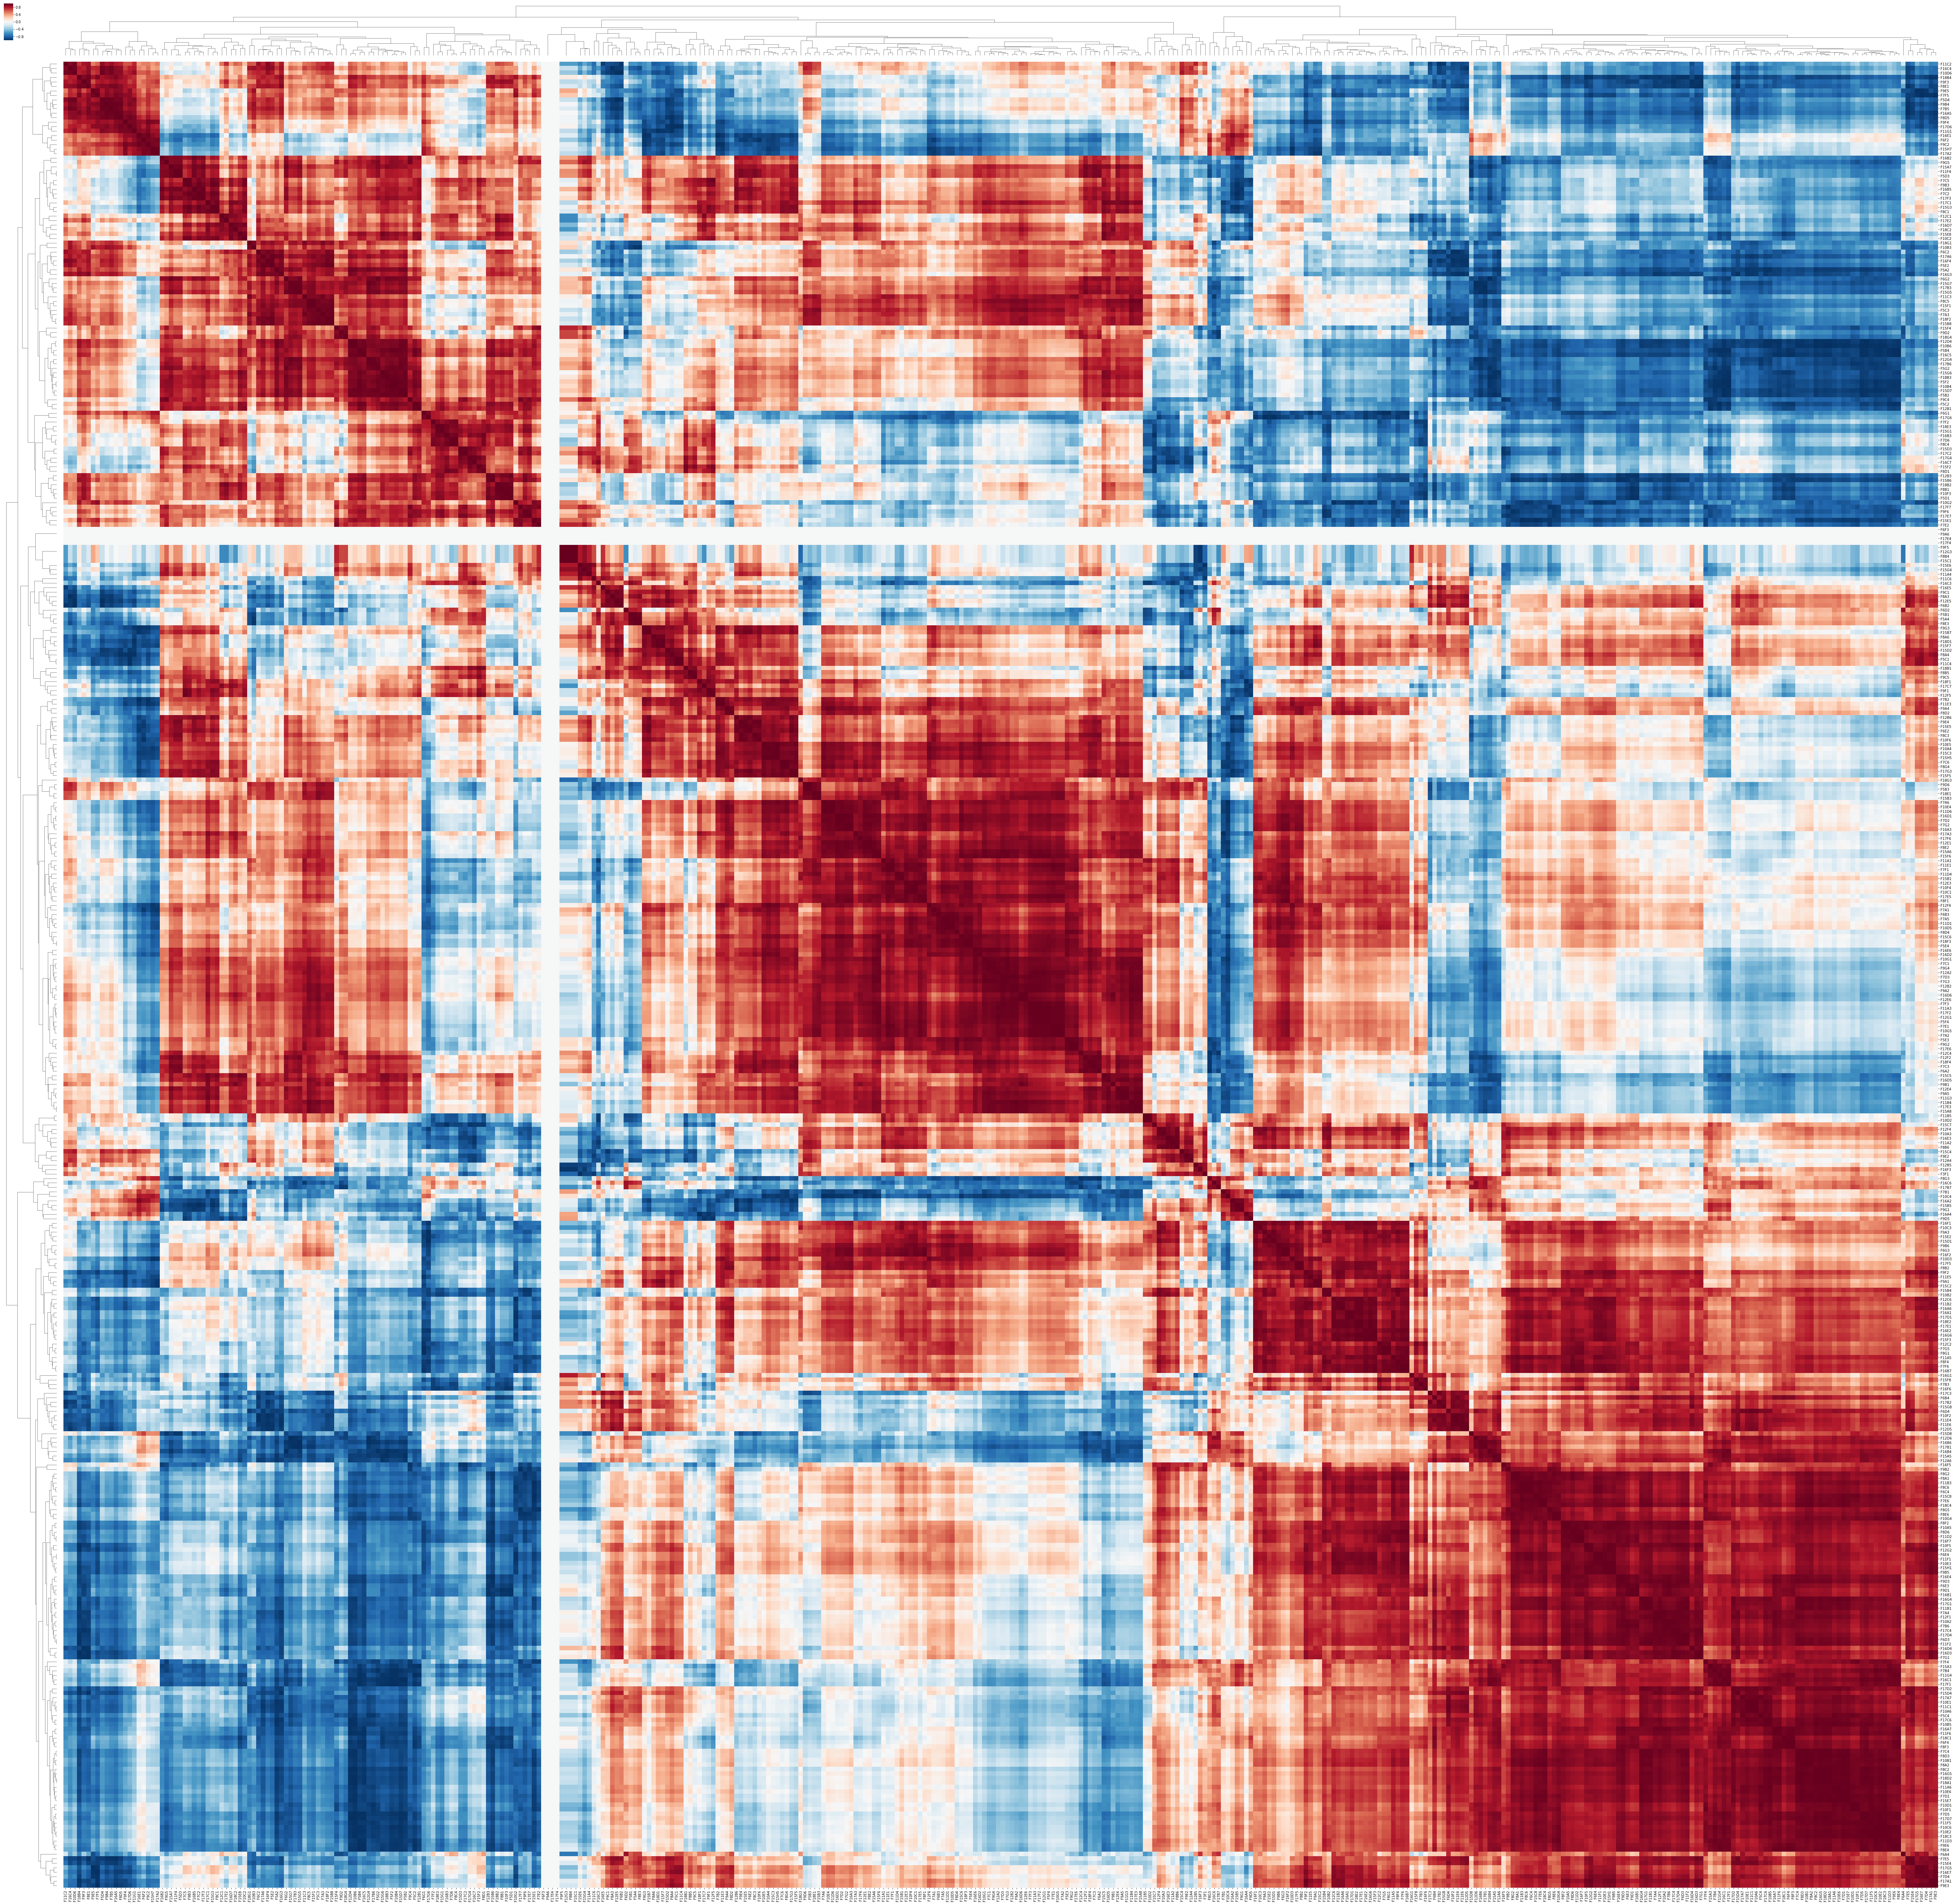

In [51]:
a=sns.clustermap(df2.transpose().corr().fillna(0),cmap="RdBu_r",figsize=(100,100))
a.savefig("single_cell_correlation.png")

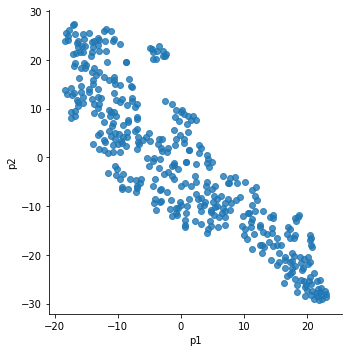

In [40]:
y1 = TSNE().fit_transform(df2/df2.max())
data1 = pd.DataFrame(y1,columns=["p1",'p2'])
sns.lmplot(x="p1", y="p2", data=data1,fit_reg=False)

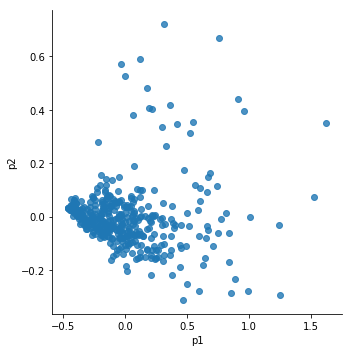

In [41]:
y1 = PCA(2).fit_transform(df2/df2.max())
data1 = pd.DataFrame(y1,columns=["p1",'p2'])
sns.lmplot(x="p1", y="p2", data=data1,fit_reg=False)

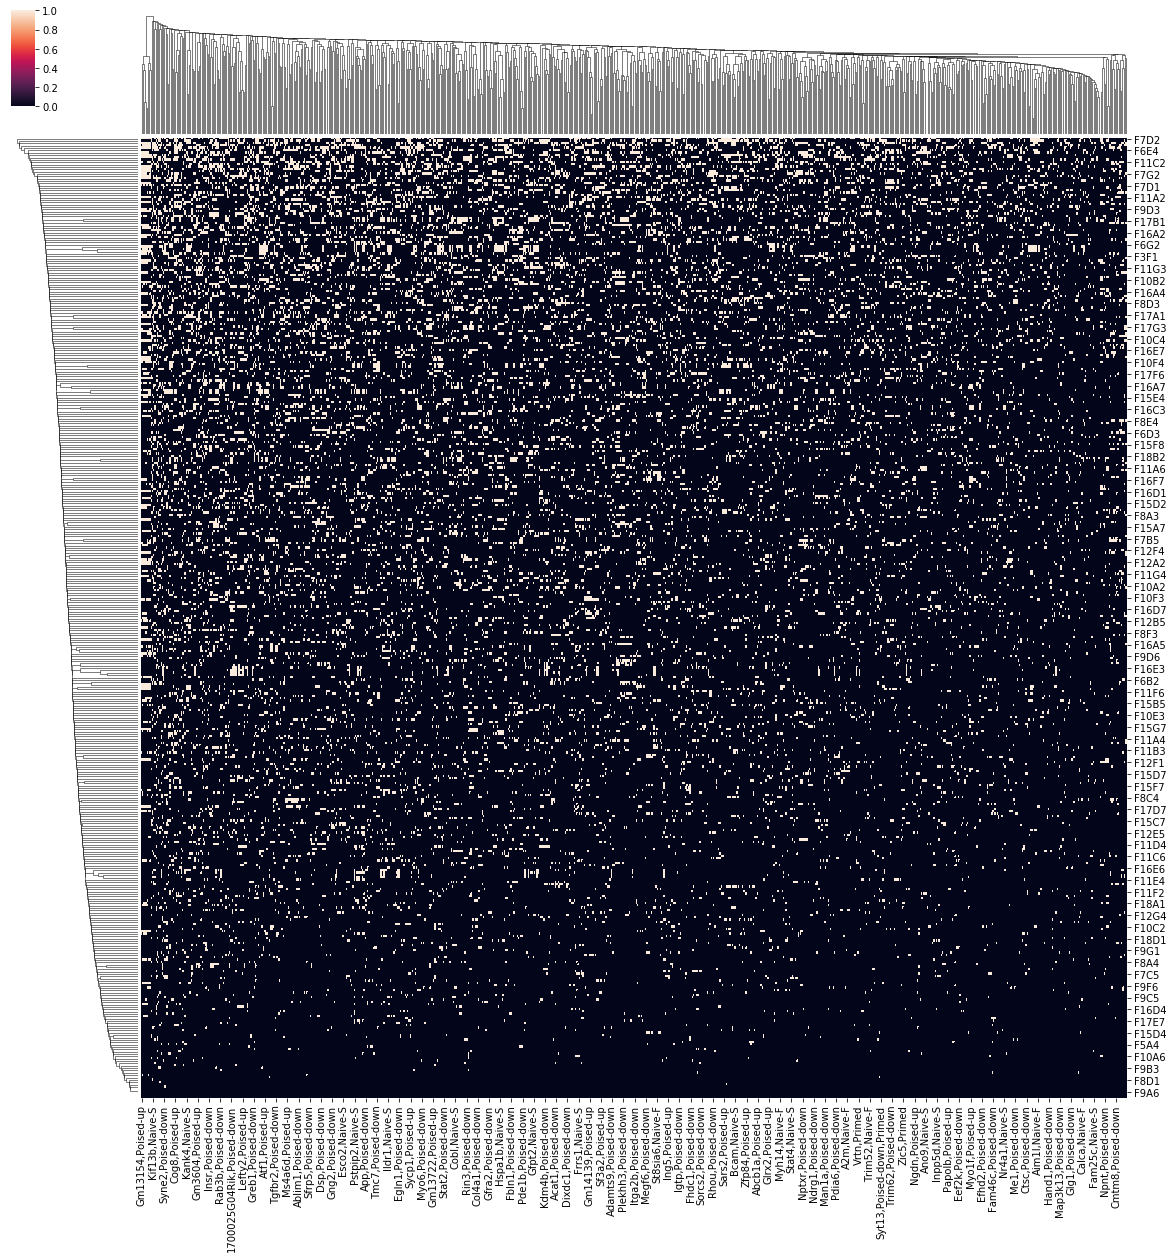

In [12]:
sns.clustermap((df>0).astype(int)[df.columns[:-1]],figsize=(20,20))

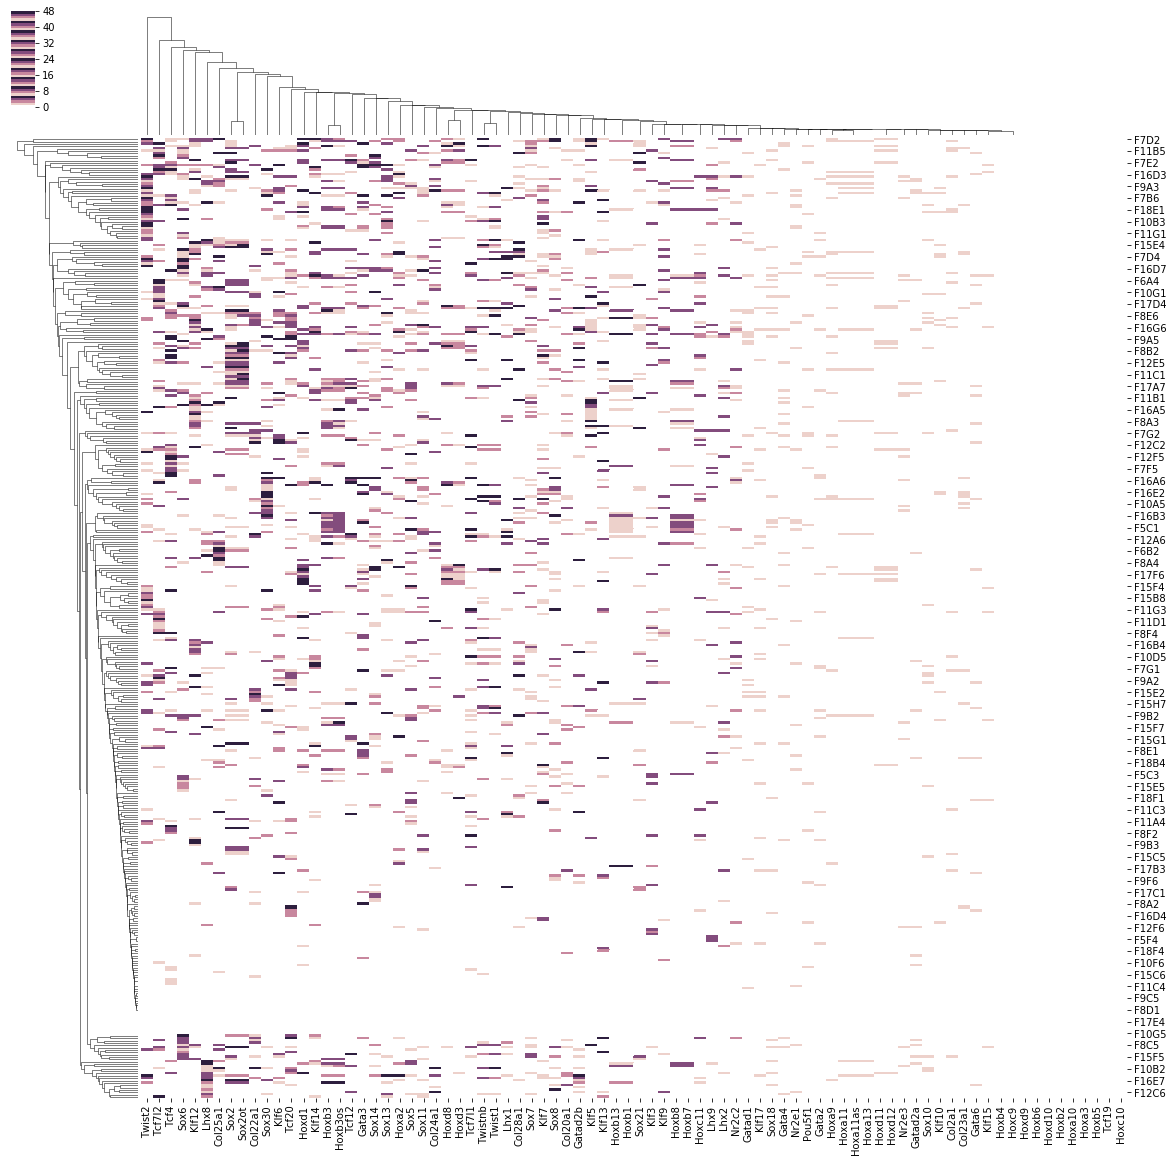

In [29]:
from matplotlib.colors import LinearSegmentedColormap,ListedColormap
myColors = sns.cubehelix_palette(4)
my_new_colors = [[1.0,1.0,1.0]]*1+myColors*10
cmap = LinearSegmentedColormap.from_list('Custom', my_new_colors, len(my_new_colors))
sns.clustermap(df[df.columns[:-1]],figsize=(20,20),cmap=cmap)

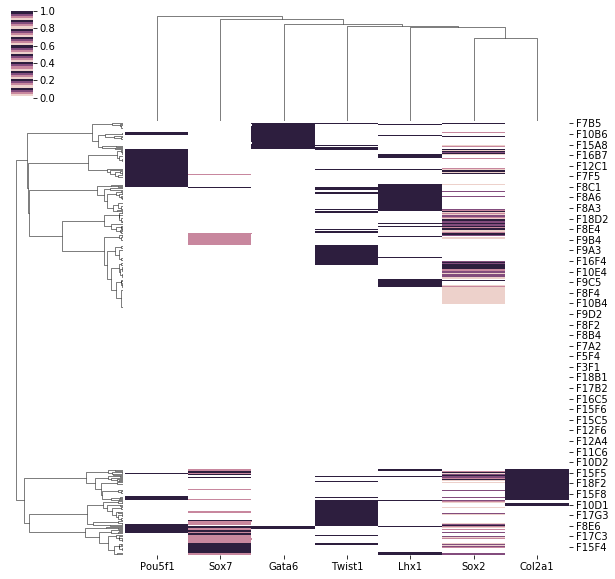

In [37]:
from matplotlib.colors import LinearSegmentedColormap,ListedColormap
myColors = sns.cubehelix_palette(4)
my_new_colors = [[1.0,1.0,1.0]]*1+myColors*10
cmap = LinearSegmentedColormap.from_list('Custom', my_new_colors, len(my_new_colors))
sns.clustermap(df[['Sox2','Pou5f1','Sox7','Gata6','Twist1','Col2a1','Lhx1']],cmap=cmap,method="ward",standard_scale=1)

In [15]:
def discrete_cmap(N, base_cmap=None):
    """Create an N-bin discrete colormap from the specified input map"""

    # Note that if base_cmap is a string or None, you can simply do
    #    return plt.cm.get_cmap(base_cmap, N)
    # The following works for string, None, or a colormap instance:

    base = plt.cm.get_cmap(base_cmap)
    color_list = base(np.linspace(0, 1, N))
    cmap_name = base.name + str(N)
    return base.from_list(cmap_name, color_list, N)


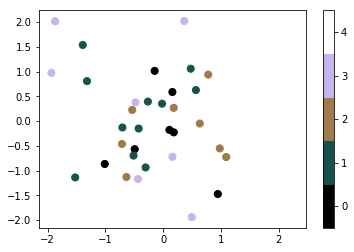

In [17]:
import numpy as np
N = 5

x = np.random.randn(40)
y = np.random.randn(40)
c = np.random.randint(N, size=40)

# Edit: don't use the default ('jet') because it makes @mwaskom mad...
plt.scatter(x, y, c=c, s=50, cmap=discrete_cmap(N, 'cubehelix'))
plt.colorbar(ticks=range(N))
plt.clim(-0.5, N - 0.5)

In [18]:
base = plt.cm.get_cmap(None)
N=5
color_list = base(np.linspace(0, 1, N))
cmap_name = base.name + str(N)

In [21]:
color_list.shape

(5, 4)

In [41]:
subdf = df[df.total_number_interactions >= 5000]

In [42]:
subdf.shape

(293, 83)

In [44]:
subdf[subdf[['Sox2','Pou5f1','Sox7','Gata6','Twist1','Col2a1','Lhx1']].sum(axis=1) > 0].shape

(215, 83)

In [40]:
df[['Sox2','Pou5f1','Sox7','Gata6','Twist1','Col2a1','Lhx1']].sum(axis=1) > 0

F10A2     True
F10A3    False
F10A4    False
F10A5     True
F10A6    False
F10B1    False
F10B2     True
F10B3     True
F10B4     True
F10B5     True
F10B6     True
F10C1     True
F10C2    False
F10C3     True
F10C4    False
F10C6     True
F10D1     True
F10D2    False
F10D3     True
F10D5     True
F10D6     True
F10E1    False
F10E2     True
F10E3     True
F10E4     True
F10E5     True
F10E6     True
F10F1     True
F10F2     True
F10F3    False
         ...  
F9B2      True
F9B3     False
F9B4      True
F9B5      True
F9B6     False
F9C1     False
F9C2     False
F9C4     False
F9C5      True
F9D1     False
F9D2     False
F9D3      True
F9D5     False
F9D6     False
F9E2      True
F9E3      True
F9E4     False
F9E5     False
F9E6      True
F9F1     False
F9F2      True
F9F3      True
F9F4      True
F9F5      True
F9F6     False
F9G1     False
F9G2      True
F9G3     False
F9G4      True
F9G5      True
Length: 408, dtype: bool